In [36]:
from importlib import reload
import minigraphs.miniaturize as mini
import networkx as nx
import matplotlib.pyplot as plt

reload(mini)

<module 'minigraphs.miniaturize' from '/mnt/ufs18/home-245/martjor/repos/dev_pt/src/minigraphs/miniaturize.py'>

In [40]:
metrics_funcs = {
    'density': mini.NX_DENSITY,
    'clustering': mini.NX_AVERAGE_CLUSTERING,
    'assortativity': mini.NX_DEGREE_ASSORTATIVITY
}

n_steps = 1000
beta = 100
schedule = mini.schedule_sigmoid(n_steps,beta)

annealer = mini.MH(schedule,metrics_funcs,n_steps,n_changes=1)

In [41]:
G = nx.erdos_renyi_graph(100,0.5)
metrics = {
    'density': 0.3,
    'clustering': 0.5,
    'assortativity': 0.1
}

annealer.transform(G,metrics,verbose=False)
trajectories = annealer.trajectories_

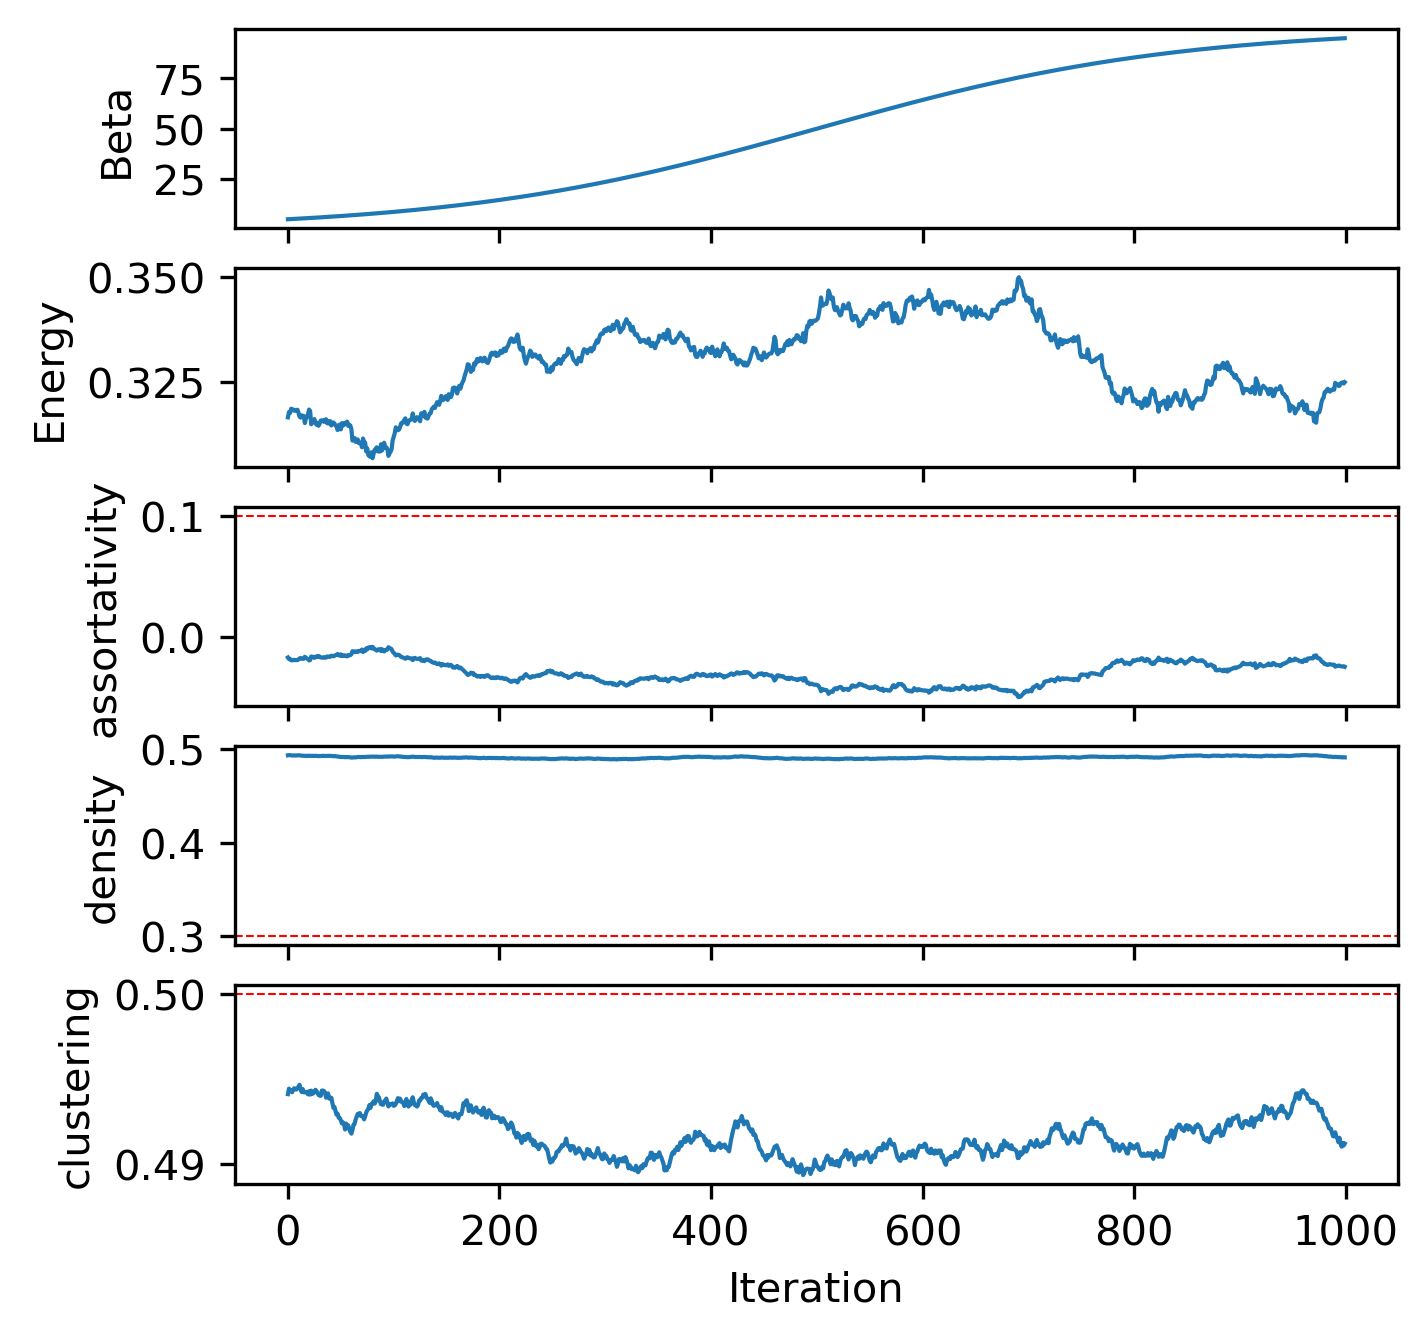

In [42]:
mini.MH.plot_trajectories(trajectories,metrics)

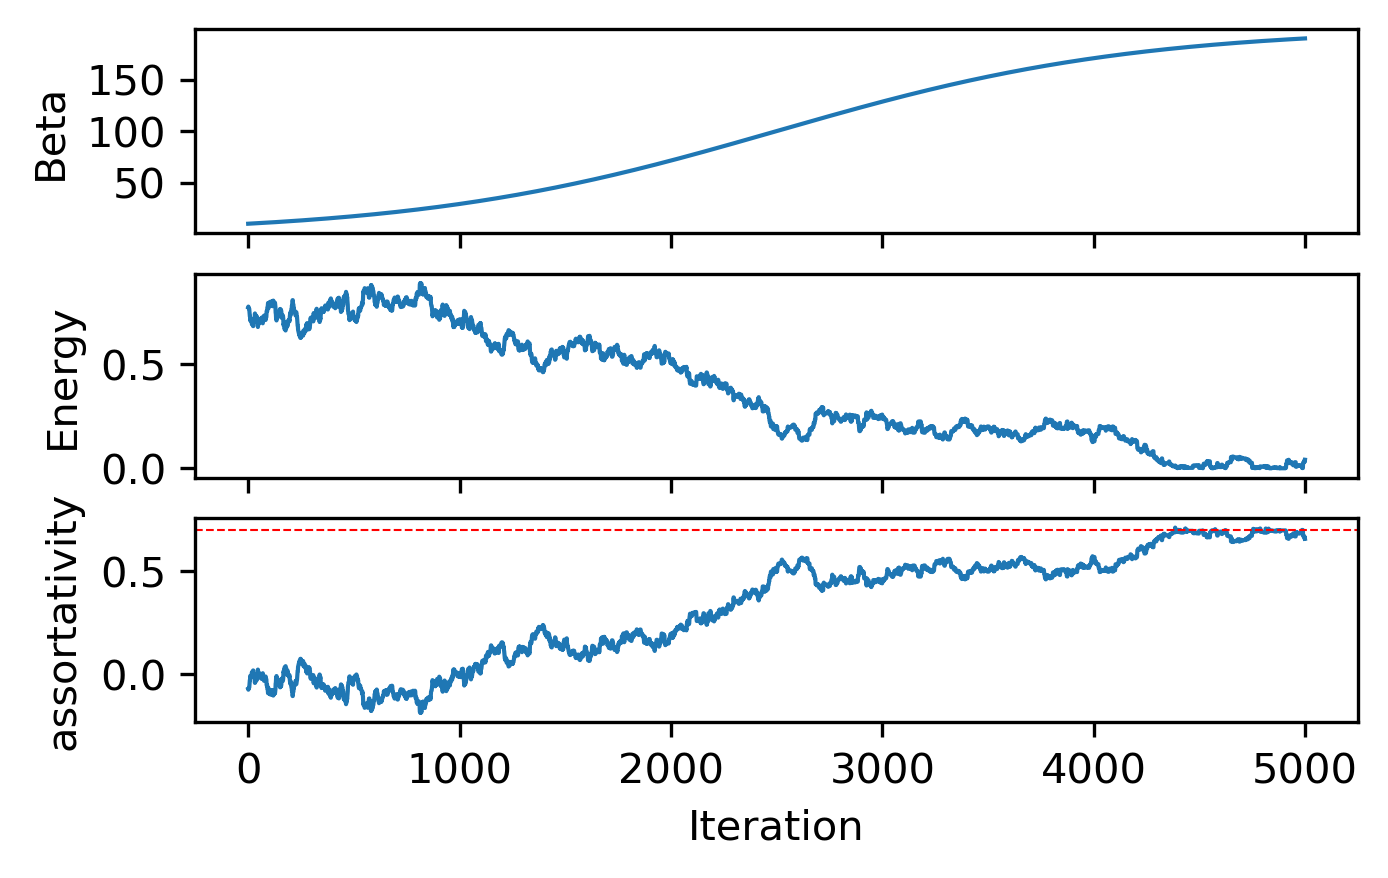

In [51]:
n_steps = 5000
beta = 200

# Logistic schedule
schedule = mini.schedule_sigmoid(n_steps,beta)
annealer = mini.MH(schedule,metrics_funcs,n_steps,n_changes=1)

G = nx.erdos_renyi_graph(100,0.05)
metrics = {
    'assortativity': 0.7
}

annealer.transform(G,metrics)
mini.MH.plot_trajectories(annealer.trajectories_,metrics)

